In [423]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime
import os
import sys
import argparse
import json
import re
import logging
import warnings
from typing import List, Dict, Tuple
from matplotlib import rcParams
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable
from matplotlib import colors
from matplotlib import ticker as mticker
from matplotlib import patches
from matplotlib import gridspec  

In [424]:
# Load the path from a CSV file
path = os.getcwd()
path=os.path.join(path, 'data/')

csv_file = os.path.join(path, 'laptop_data.csv')
print(f"Loading CSV file from: {csv_file}")

Loading CSV file from: /Users/devs/Desktop/Collections/DataAnalyst/Learning_Data/data/laptop_data.csv


In [425]:
try:
    df = pd.read_csv(csv_file, sep=',', header=0, encoding='utf-8', on_bad_lines='skip')
except FileNotFoundError:
    print(f"Error: CSV file not found at {csv_file}. Please check the path.")
    sys.exit(1)
except pd.errors.EmptyDataError:
    print(f"Error: CSV file is empty at {csv_file}. Please check the file.")
    sys.exit(1)
except pd.errors.ParserError:
    print(f"Error: CSV file is malformed at {csv_file}. Please check the file.")
    sys.exit(1)
except Exception as e:
    print(f"Error: An unexpected error occurred while loading the CSV file: {e}")
    sys.exit(1)

In [426]:
# Check if the CSV file is empty
if df.empty:
    print("Error: The CSV file is empty. Please check the file.")
    sys.exit(1)

In [427]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [428]:
# Hiển thị danh sách cột dữ liệu
df.columns = df.columns.str.strip()
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [429]:
# Remove unnecessary columns
df.drop('Unnamed: 0', inplace=True, axis=1, errors='ignore')

In [430]:
df.shape

(1303, 11)

In [431]:
df.duplicated().sum()

np.int64(29)

In [432]:
df.drop_duplicates(inplace=True)
df.shape

(1274, 11)

In [433]:

df.duplicated().sum()

np.int64(0)

# Chuẩn hoá định dạng dữ liệu

In [434]:
df.Weight.value_counts()
df.Weight = df.Weight.str.replace('kg', '').astype(float)
df.Weight.value_counts()

Weight
2.20    119
2.10     58
2.00     45
2.40     42
2.50     38
       ... 
4.50      1
1.14      1
3.80      1
3.25      1
2.34      1
Name: count, Length: 171, dtype: int64

In [435]:
df.Ram.value_counts()
df.Ram = df.Ram.str.replace('GB', '').astype(int)
df.Ram.value_counts()

Ram
8     613
4     366
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64

In [436]:
#!pip install skimpy

In [437]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1274   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 11     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column    ┃ NA   ┃ NA %   ┃ mean    ┃ sd        ┃ p0     ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ Inches    │    0 │      0 │   15.02 │      1.43 │   10.1 │      14 │    15.6 │    15.6 │    18.4 │  ▁▅█ ▂  │  │
│ │ Ram       │    0 │      0 │   8.444 │     5.098 │      2 │       4 │       8 │       8 │      64 │   █▂    │  │
│ │ Weight    │    0 │      0 │    2.04 │    0.6694 │   0.69 │     1.5 │    2.04 │    2.31 │     4.7 │ ▃▇█▂ ▁  │  │
│ │ Price     │    0 │      0 │   60500 │     37330 │   9271 │   32500 │   52690 │   79770 │  325000 │   █▄▁   │  │
│ └───────────┴──────┴────────┴─────────┴───────────┴────────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Company   │  0 │    0 │ HP        │ Microsoft │ Acer      │ Xiaomi    │      4.21 │         1 │       1274 │  │
│ │ TypeName  │  0 │    0 │ Gaming    │ 2 in 1    │ 2 in 1    │ Workstati │       8.8 │       1.3 │       1625 │  │
│ │           │    │      │           │ Convertib │ Convertib │ on        │           │           │            │  │
│ │           │    │      │           │ le        │ le        │           │           │           │            │  │
│ │ ScreenRes │  0 │    0 │ 1440x900  │ IPS Panel │ 1366x768  │ Touchscre │      19.6 │       3.3 │       4208 │  │
│ │ olution   │    │      │           │ 4K Ultra  │           │ en        │           │           │            │  │
│ │           │    │      │           │ HD /      │           │ 2560x1440 │           │           │            │  │
│ │           │    │      │           │ Touchscre │           │           │           │           │            │  │
│ │           │    │      │           │ en        │           │           │           │           │            │  │
│ │           │    │      │           │ 3840x2160 │           │           │           │           │            │  │
│ │ Cpu       │  0 │    0 │ AMD FX    │ Intel     │ AMD       │ Samsung   │      26.8 │         5 │       6383 │  │
│ │           │    │      │ 9830P     │ Celeron   │ A10-

In [438]:
df.Company.value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [439]:
df.OpSys.value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [440]:
df.groupby('Cpu').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,Cpu,counts
74,Intel Core i5 7200U 2.5GHz,190
102,Intel Core i7 7700HQ 2.8GHz,146
97,Intel Core i7 7500U 2.7GHz,132
106,Intel Core i7 8550U 1.8GHz,73
83,Intel Core i5 8250U 1.6GHz,72
...,...,...
28,Intel Atom Z8350 1.92GHz,1
84,Intel Core i7 2.2GHz,1
85,Intel Core i7 2.7GHz,1
53,Intel Core M m7-6Y75 1.2GHz,1


In [441]:
def parese_screen_resuolution(screeen_resolution):
    touchScreen = 'Touchscreen' in screeen_resolution or 'Touch' in screeen_resolution
    resoulution = screeen_resolution.split()[-1]
    return resoulution, touchScreen

#df['Resolution'], df['Touchscreen'] = zip(*df.ScreenResolution.apply(parese_screen_resuolution))
df[['Resolution', 'Touchscreen']] = df['ScreenResolution'].apply(
    lambda x: pd.Series(parese_screen_resuolution(x))
)

df.Touchscreen = df.Touchscreen.apply(lambda x: 'Yes' if x else 'No')

In [442]:
no_hd_data = df[~df['ScreenResolution'].str.contains('HD',case=False, na=False)]
no_hd_data.ScreenResolution.value_counts()

ScreenResolution
1366x768                              262
1600x900                               23
Touchscreen 1366x768                   16
Touchscreen 2560x1440                   7
IPS Panel 1366x768                      7
Touchscreen 2256x1504                   6
IPS Panel Retina Display 2560x1600      6
IPS Panel Retina Display 2304x1440      6
IPS Panel Touchscreen 2560x1440         5
IPS Panel Touchscreen 1920x1200         4
1440x900                                4
IPS Panel Retina Display 2880x1800      4
IPS Panel 2560x1440                     4
Touchscreen 2400x1600                   3
2560x1440                               3
IPS Panel Touchscreen 1366x768          3
1920x1080                               3
IPS Panel Retina Display 2736x1824      1
IPS Panel Touchscreen 2400x1600         1
Name: count, dtype: int64

In [443]:
def categorize_screen_resolution(resolution):
    if '4K Ultra HD' in resolution:
        return '4K Ultra HD'
    elif 'Quad HD+' in resolution:
        return 'Quad HD+'
    elif 'Full HD' in resolution:
        return 'Full HD'
    elif 'HD' in resolution:
        return 'HD'
    else:
        return None
df['HD_Category'] = df['ScreenResolution'].apply(categorize_screen_resolution)

In [444]:
df.HD_Category.isnull().sum()

np.int64(368)

In [445]:
df[df.HD_Category.isnull()]


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,Touchscreen,HD_Category
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,No,None
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,No,None
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,No,None
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,No,None
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,1366x768,No,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.30,42943.1472,1366x768,No,None
1268,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17,11135.5200,1366x768,No,None
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,1366x768,No,None
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,1366x768,No,None


In [446]:
def fill_missing_hd(row, resolution):
    if row is not None:
        return row
    if '1366x768' in resolution or '1440x900' in resolution:
        return 'HD'
    elif '1920x1080' in resolution or '1920x1200' in resolution:
        return 'Full HD'
    elif '1600x900' in resolution :
        return 'HD+'
    elif '2560x1440' in resolution:
        return '2K Ultra HD'
    elif '3840x2160' in resolution or '2880x1800' in resolution or '2736x1824' in resolution:
        return '4K Ultra HD'
    elif '2256x1504' in resolution or '2304x1440' in resolution or '2560x1600' in resolution or '2400x1600' in resolution:
        return 'Quad HD'
    else: 
        return None
df['HD_Category'] = df.apply(
    lambda row: fill_missing_hd(row['HD_Category'], row['Resolution']), axis=1
)


In [447]:
# Tách giá trị tốc độ CPU từ cột 'Cpu'
df['GHz']=df['Cpu'].str.extract(r'(\d+\.?\d*)\s?GHz')

In [448]:
# Loại bỏ thông tin về CPU sau khi đã tách, sau đó loại bỏ khoảng trắng đầu và cuối câu
df['Cpu'] = df['Cpu'].str.replace(r'\d+(\.\d+)?Ghz', '', regex=True).str.strip()

In [449]:
# Viêt hàm tách thương hiệu nhà sản xuất CPU và số nhân
def extract_cpu_brand(cpu):
    if 'Intel' in cpu:
        manufacturer = 'Intel'
        core=cpu.split()[2]
    elif 'AMD' in cpu:
        manufacturer = 'AMD'
        core=cpu.split()[2]
    else:
        manufacturer = 'Samsung'
        core=None
    return manufacturer, core
df[['Cpu_Manufacturer', 'Cpu_Core']] = df['Cpu'].apply(
    lambda x: pd.Series(extract_cpu_brand(x))
)

In [450]:
# Tách nhà sản xuất GPU
def extract_gpu_brand(gpu):
    if 'NVIDIA' in gpu:
        manufacturer = 'NVIDIA'
    elif 'AMD' in gpu:
        manufacturer = 'AMD'
    elif 'Intel' in gpu:
        manufacturer = 'Intel'
    else:
        manufacturer = 'Other'
    return manufacturer
df['Gpu_Manufacturer'] = df['Gpu'].apply(
    lambda x: extract_gpu_brand(x)
)

In [451]:
df.to_excel('laptop_data_cleaned.xlsx', index=False)

In [452]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,Touchscreen,HD_Category,GHz,Cpu_Manufacturer,Cpu_Core,Gpu_Manufacturer
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,No,Quad HD,2.3,Intel,i5,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,No,HD,1.8,Intel,i5,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,No,Full HD,2.5,Intel,i5,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,No,4K Ultra HD,2.7,Intel,i7,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,No,Quad HD,3.1,Intel,i5,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,1366x768,No,HD,2.5,Intel,i7,Other
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1920x1080,Yes,Full HD,2.5,Intel,i7,Intel
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,3200x1800,Yes,Quad HD+,2.5,Intel,i7,Intel
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,1366x768,No,HD,1.6,Intel,Dual,Intel


In [459]:
numereric_columns=['Inches', 'Weight', 'Ram', 'Price']
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    # print(f"Outliers in {column}:")
    # print(outliers)
    # print(f"Lower bound: {lower_bound}")
    # print(f"Upper bound: {upper_bound}")
    return outliers

for col in numereric_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"Trong {col} Tìm thấy {outliers.sum()} giá trị.")

Trong Inches Tìm thấy 37 giá trị.
Trong Weight Tìm thấy 45 giá trị.
Trong Ram Tìm thấy 219 giá trị.
Trong Price Tìm thấy 28 giá trị.


In [461]:
from scipy.stats import zscore
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(zscore(df[column]))
    outliers = (z_scores > threshold) | (z_scores < -threshold)
    return outliers
for col in numereric_columns:
    outliers = detect_outliers_zscore(df, col)
    print(f"Trong {col} Tìm thấy {outliers.sum()} giá trị.")
    # if outliers.sum() > 0:
    #     print(f"Outliers in {col}:")
    #     print(df.loc[outliers, col])
    #     print()

Trong Inches Tìm thấy 4 giá trị.
Trong Weight Tìm thấy 33 giá trị.
Trong Ram Tìm thấy 21 giá trị.
Trong Price Tìm thấy 12 giá trị.


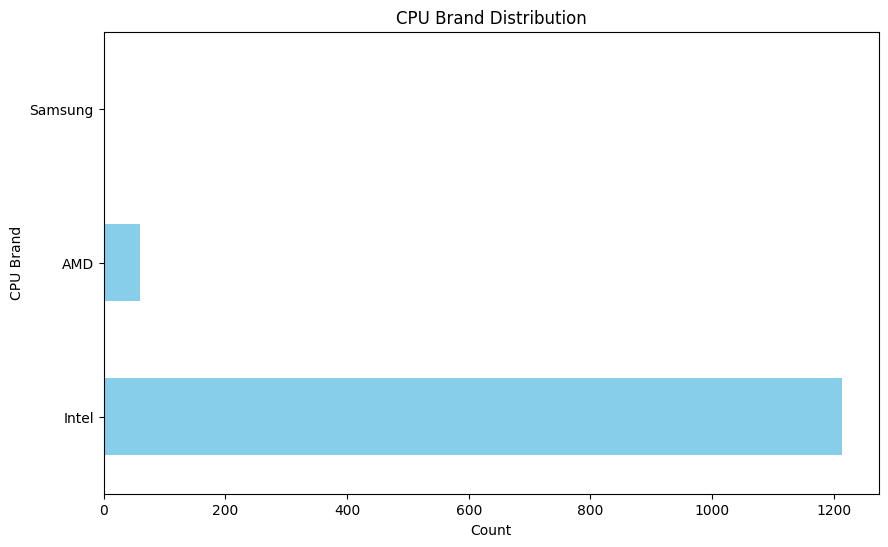

In [454]:
def extract_cpu_brand(cpu: str) -> str:
    """
    Extract the CPU brand from the CPU string.
    """
    match = re.search(r'(\w+)', cpu)
    if match:
        return match.group(1)
    return 'Unknown'
df['Cpu_brand'] = df['Cpu'].apply(extract_cpu_brand)
df['Cpu_brand'].value_counts()
df['Cpu_brand'].value_counts().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('CPU Brand Distribution')
plt.xlabel('Count')
plt.ylabel('CPU Brand')
plt.show()

In [455]:
df.groupby('ScreenResolution').size().reset_index(name='counts')

,ScreenResolution,counts
0,1366x768,262
1,1440x900,4
2,1600x900,23
3,1920x1080,3
4,2560x1440,3
5,4K Ultra HD / Touchscreen 3840x2160,10
6,4K Ultra HD 3840x2160,7
7,Full HD / Touchscreen 1920x1080,47
8,Full HD 1920x1080,505
9,IPS Panel 1366x768,7


In [456]:
df.columns.tolist()

['Company',
 'TypeName',
 'Inches',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight',
 'Price',
 'Resolution',
 'Touchscreen',
 'HD_Category',
 'GHz',
 'Cpu_Manufacturer',
 'Cpu_Core',
 'Gpu_Manufacturer',
 'Cpu_brand']

In [457]:

# Check if the CSV file has the expected columns
expected_columns = ['Brand', 'Model', 'CPU', 'GPU', 'RAM', 'Storage', 'Price', 'Release Date']
missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    print(f"Error: The CSV file is missing the following columns: {', '.join(missing_columns)}")
    sys.exit(1)
# Check if the CSV file has the expected data types
expected_dtypes = {
    'Brand': str,
    'Model': str,
    'CPU': str,
    'GPU': str,
    'RAM': int,
    'Storage': int,
    'Price': float,
    'Release Date': str
}
missing_dtypes = []
for col, expected_dtype in expected_dtypes.items():
    if not pd.api.types.is_dtype_equal(df[col].dtype, expected_dtype):
        missing_dtypes.append(col)
if missing_dtypes:      
    print(f"Error: The CSV file has unexpected data types for the following columns: {', '.join(missing_dtypes)}")
    sys.exit(1)
# Check if the CSV file has any missing values
missing_values = df.isnull().sum()
if missing_values.any():
    print("Error: The CSV file has missing values in the following columns:")
    for col, count in missing_values.items():
        if count > 0:
            print(f"  {col}: {count} missing values")
    sys.exit(1)
# Check if the CSV file has any duplicate rows
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Error: The CSV file has {duplicate_rows} duplicate rows. Please check the file.")
    sys.exit(1)
# Check if the CSV file has any invalid values
invalid_values = df[~df['Brand'].isin(['Dell', 'HP', 'Lenovo', 'Apple', 'Asus', 'Acer'])]
if not invalid_values.empty:
    print("Error: The CSV file has invalid values in the following rows:")
    for index, row in invalid_values.iterrows():
        print(f"  Row {index}: {row.to_dict()}")
    sys.exit(1)
# Check if the CSV file has any outliers
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data: pd.Series) -> List[int]:
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers.index.tolist()
# Detect outliers in the 'Price' column
outliers = detect_outliers_iqr(df['Price'])
if outliers:
    print("Error: The CSV file has outliers in the following rows:")
    for index in outliers:
        print(f"  Row {index}: {df.iloc[index].to_dict()}")
    sys.exit(1)
# Check if the CSV file has any invalid dates
def is_valid_date(date_str: str) -> bool:
    try:
        datetime.datetime.strptime(date_str, '%Y-%m-%d')
        return True
    except ValueError:
        return False
# Check if the 'Release Date' column has any invalid dates
invalid_dates = df[~df['Release Date'].apply(is_valid_date)]
if not invalid_dates.empty:
    print("Error: The CSV file has invalid dates in the following rows:")
    for index, row in invalid_dates.iterrows():
        print(f"  Row {index}: {row.to_dict()}")
    sys.exit(1)
# Check if the CSV file has any invalid values in the 'RAM' and 'Storage' columns
invalid_ram = df[~df['RAM'].apply(lambda x: isinstance(x, int) and x > 0)]
if not invalid_ram.empty:
    print("Error: The CSV file has invalid values in the 'RAM' column in the following rows:")
    for index, row in invalid_ram.iterrows():
        print(f"  Row {index}: {row.to_dict()}")
    sys.exit(1)
invalid_storage = df[~df['Storage'].apply(lambda x: isinstance(x, int) and x > 0)]
if not invalid_storage.empty:
    print("Error: The CSV file has invalid values in the 'Storage' column in the following rows:")
    for index, row in invalid_storage.iterrows():
        print(f"  Row {index}: {row.to_dict()}")
    sys.exit(1)
# Check if the CSV file has any invalid values in the 'Price' column
invalid_price = df[~df['Price'].apply(lambda x: isinstance(x, (int, float)) and x > 0)]
if not invalid_price.empty:
    print("Error: The CSV file has invalid values in the 'Price' column in the following rows:")
    for index, row in invalid_price.iterrows():
        print(f"  Row {index}: {row.to_dict()}")
    sys.exit(1)
# Check if the CSV file has any invalid values in the 'Brand' column
invalid_brand = df[~df['Brand'].apply(lambda x: isinstance(x, str) and len(x) > 0)]
if not invalid_brand.empty:
    print("Error: The CSV file has invalid values in the 'Brand' column in the following rows:")
    for index, row in invalid_brand.iterrows():
        print(f"  Row {index}: {row.to_dict()}")
    sys.exit(1)
# Check if the CSV file has any invalid values in the 'Model' column
invalid_model = df[~df['Model'].apply(lambda x: isinstance(x, str) and len(x) > 0)]
if not invalid_model.empty:
    print("Error: The CSV file has invalid values in the 'Model' column in the following rows:")
    for index, row in invalid_model.iterrows():
        print(f"  Row {index}: {row.to_dict()}")
    sys.exit(1)
# Check if the CSV file has any invalid values in the 'CPU' column
invalid_cpu = df[~df['CPU'].apply(lambda x: isinstance(x, str) and len(x) > 0)]
if not invalid_cpu.empty:
    print("Error: The CSV file has invalid values in the 'CPU' column in the following rows:")
    for index, row in invalid_cpu.iterrows():
        print(f"  Row {index}: {row.to_dict()}")
    sys.exit(1)
# Check if the CSV file has any invalid values in the 'GPU' column
invalid_gpu = df[~df['GPU'].apply(lambda x: isinstance(x, str) and len(x) > 0)]
if not invalid_gpu.empty:
    print("Error: The CSV file has invalid values in the 'GPU' column in the following rows:")
    for index, row in invalid_gpu.iterrows():
        print(f"  Row {index}: {row.to_dict()}")
    sys.exit(1)
# Check if the CSV file has any invalid values in the 'Release Date' column
invalid_release_date = df[~df['Release Date'].apply(lambda x: isinstance(x, str) and len(x) > 0)]
if not invalid_release_date.empty:
    print("Error: The CSV file has invalid values in the 'Release Date' column in the following rows:")
    for index, row in invalid_release_date.iterrows():
        print(f"  Row {index}: {row.to_dict()}")
    sys.exit(1)
# Check if the CSV file has any invalid values in the 'RAM' column
invalid_ram = df[~df['RAM'].apply(lambda x: isinstance(x, (int, float)) and x > 0)]

Error: The CSV file is missing the following columns: Brand, Model, CPU, GPU, RAM, Storage, Release Date


SystemExit: 1

/Users/devs/Desktop/Collections/DataAnalyst/Learning_Data/venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3675: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
